start with goals & questions <br />
**goals**: <br />
spark/scala, hadoop, streaming, ML <br />
**questions**: <br />
*sentiment analysis* related to certain popular songs/artists <br />
does popular music become more or less diverse (in regards to # of genres) <br />
find rising unsigned artists and sign them to our label <br />
find diverse range of artists for music festival or radio show booking <br />
where we went: *categorize music* using kmeans, and track trends of music over time

ideation:
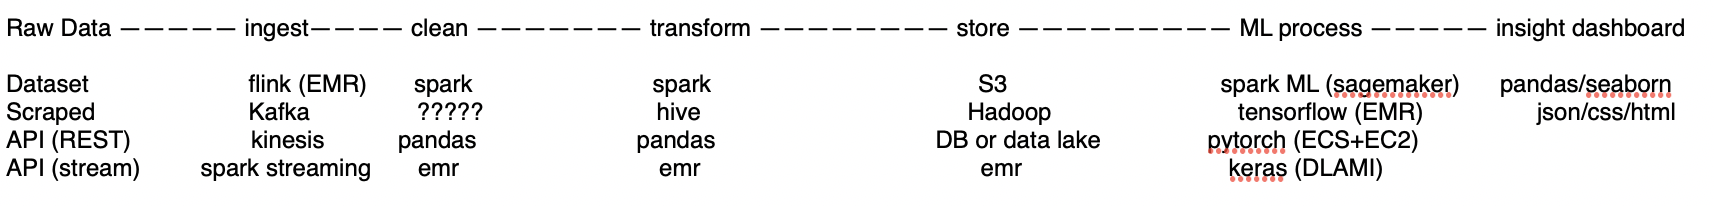

team wanted more experience w/ sqoop 
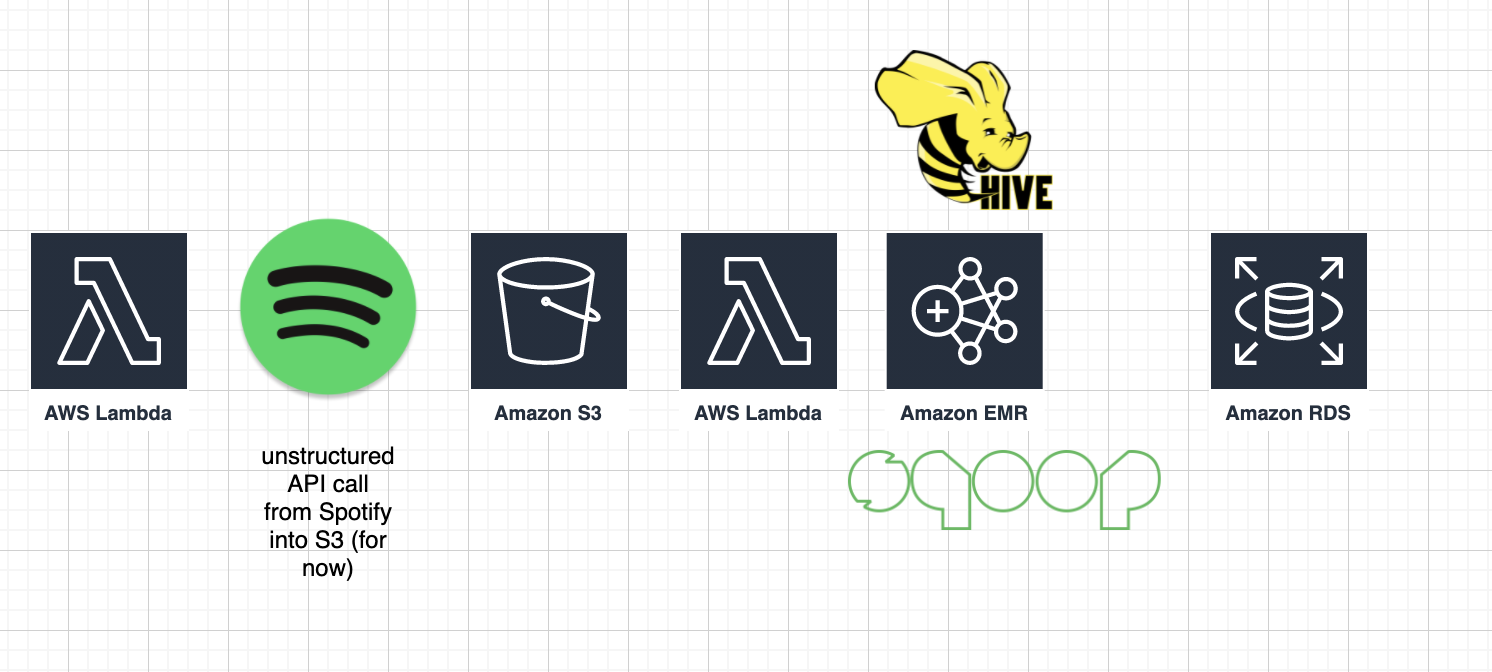

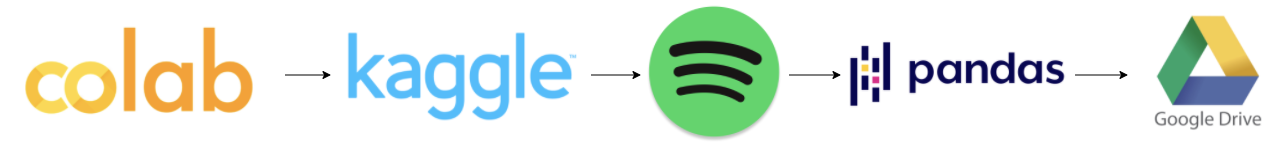

above: gather data -> process and store <br />
below: load data -> run ML model

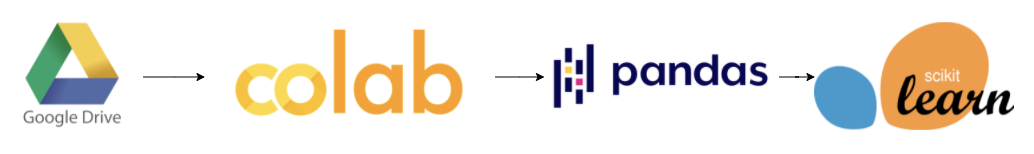

sample kmeans output <br />
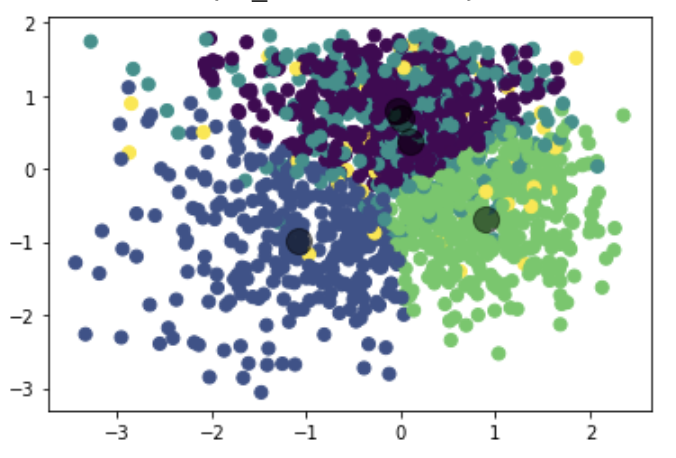

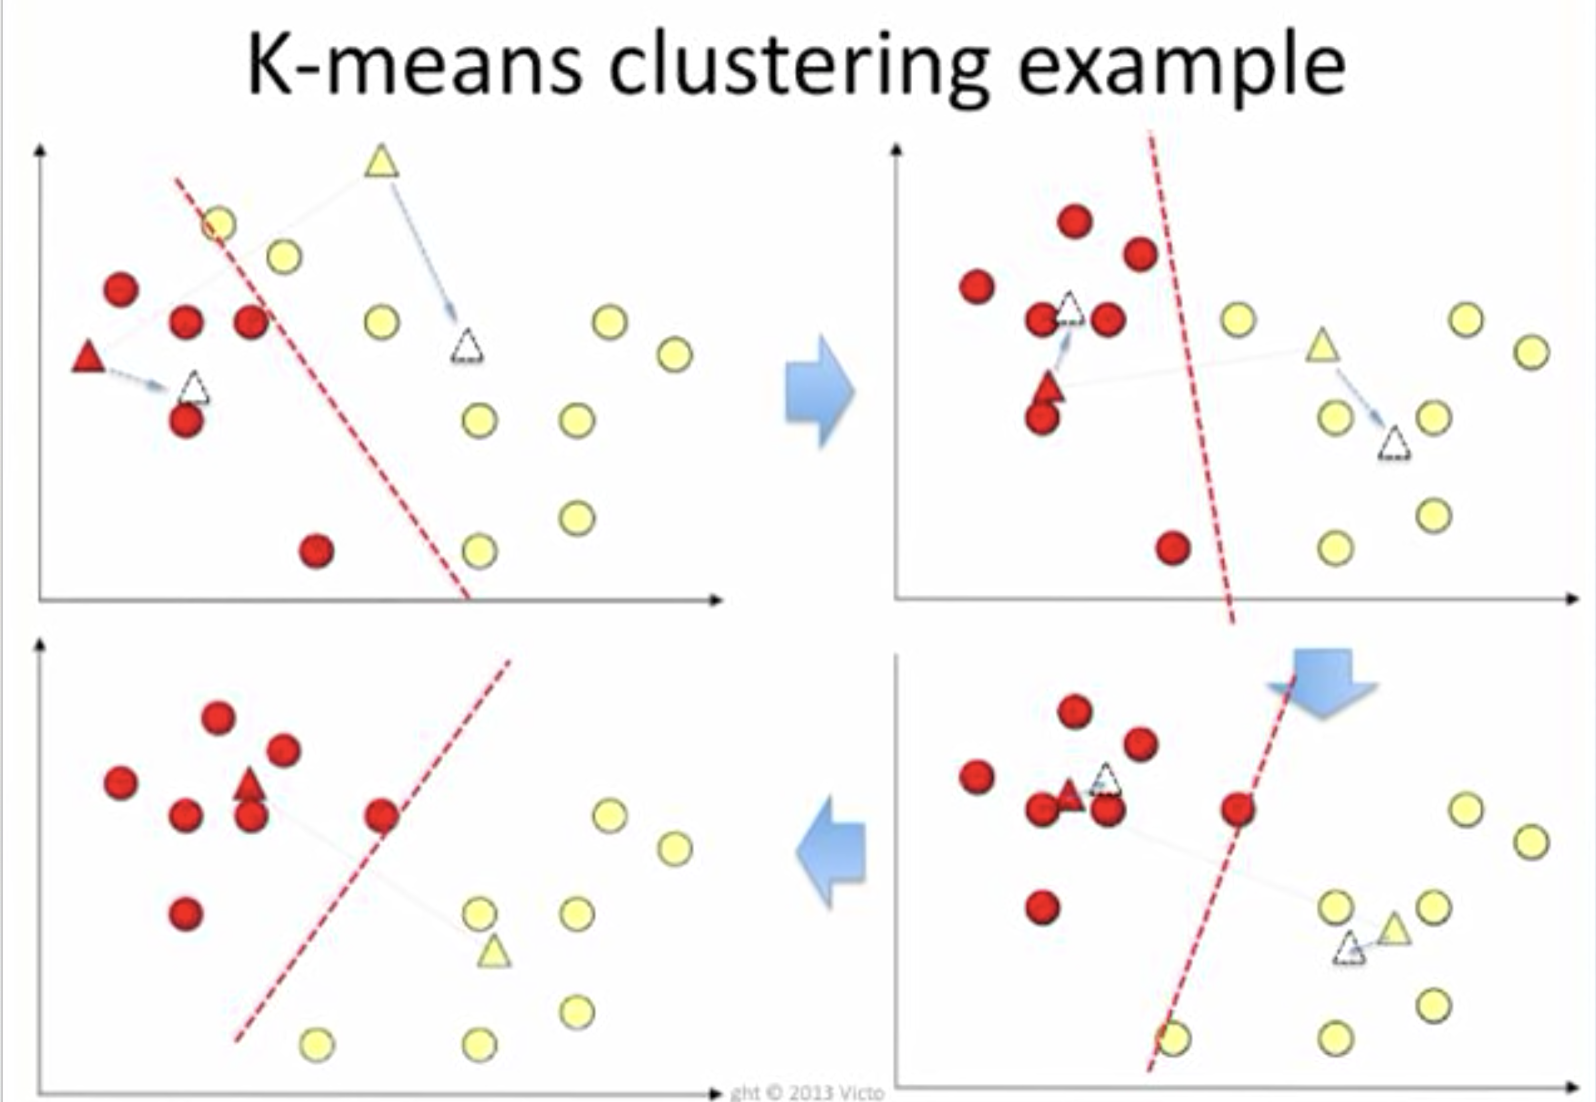

In [ ]:
pip install spotipy # spotify API
!pip install kaggle # kaggle billboard top 100 1960->2020 dataset

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.cluster import KMeans

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

In [ ]:
"""OPENING DATAFRAMES
"""

from google.colab import  drive

drive.mount('/drive')
files = []

for i in range(5):
  filepath = "/path/to/your/drive/folder/{}_df_single.csv".format(i) # your path may be different
  file1 = open(filepath, "r")
  files.append(file1)

df_collection = []
for file in files:
  df_collection.append(pd.read_csv(file))

In [ ]:
"""pca_2 = PCA(n_components=12)
pca_2_result = pca_2.fit_transform(df_collection[0])
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 5 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
pca_df = pd.DataFrame(pca_2.components_,columns=df_collection[0].columns)

copy = make_copy(df_collection[1])

kmeans = KMeans(n_clusters=2, max_iter=300)    
kmeans.fit(copy)
label = kmeans.fit_predict(copy)
y_kmeans = kmeans.predict(copy)"""

Explained variation per principal component: [0.19655198 0.11151037 0.0972762  0.08368257 0.07762406 0.07135487
 0.06939328 0.06257983 0.05806323 0.05491789 0.04655422 0.03572818]
Cumulative variance explained by 5 principal components: 96.52%


In [ ]:
df_collection[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1901 non-null   float64
 1   danceability      1901 non-null   float64
 2   energy            1901 non-null   float64
 3   key               1901 non-null   float64
 4   loudness          1901 non-null   float64
 5   mode              1901 non-null   float64
 6   speechiness       1901 non-null   float64
 7   acousticness      1901 non-null   float64
 8   instrumentalness  1901 non-null   float64
 9   liveness          1901 non-null   float64
 10  valence           1901 non-null   float64
 11  tempo             1901 non-null   float64
 12  duration_ms       1901 non-null   float64
 13  time_signature    1901 non-null   float64
dtypes: float64(14)
memory usage: 208.0 KB


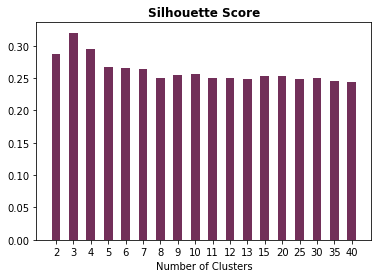

hello ::::: 3 {'n_clusters': 40}


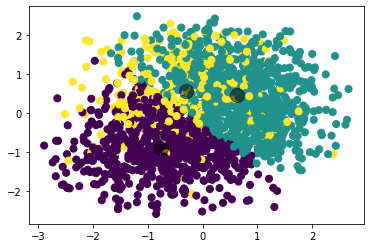

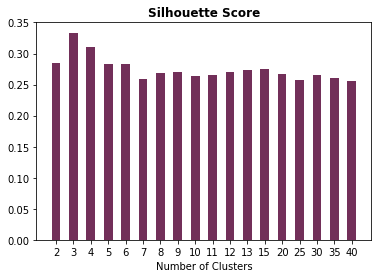

hello ::::: 3 {'n_clusters': 40}


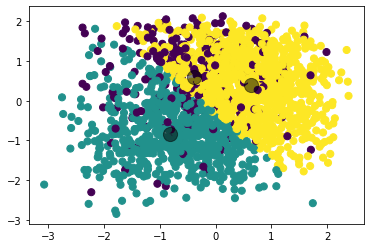

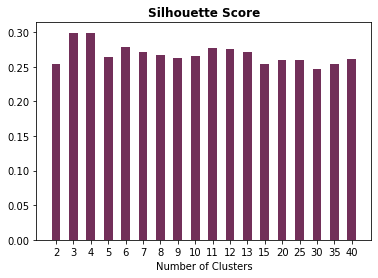

hello ::::: 3 {'n_clusters': 40}


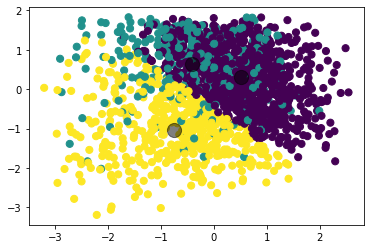

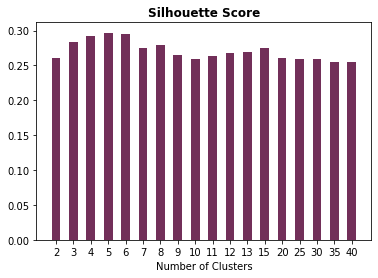

hello ::::: 5 {'n_clusters': 40}


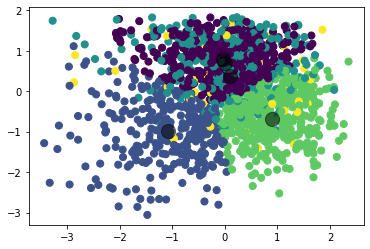

KeyError: ignored

In [ ]:
def make_copy(df):
  copy = df
  copy.drop(columns=['artist', 'song', 'id', 'explicit', 'popularity', 'Unnamed: 0', 'speechiness', 'tempo', 'duration_ms', 'time_signature', 'acousticness', 'instrumentalness', 'mode', 'key', 'loudness', 'valence'], inplace=True)
  copy[copy.columns] = StandardScaler().fit_transform(copy)
  return copy

def get_optimal_kmean_clusters(df):
  # candidate values for our number of cluster
  parameters = [2, 3, 4, 5, 6,7,8,9, 10,11,12,13]
  # instantiating ParameterGrid, pass number of clusters as input
  parameter_grid = ParameterGrid({'n_clusters': parameters})
  best_score = -1
  kmeans_model = KMeans()     # instantiating KMeans model
  silhouette_scores = []
  clusters_to_use = 0
  # evaluation based on silhouette_score
  for p in parameter_grid:
      kmeans_model.set_params(**p)    # set current hyper parameter
      kmeans_model.fit(df)          # fit model on wine dataset, this will find clusters based on parameter p
      ss = metrics.silhouette_score(df, kmeans_model.labels_)   # calculate silhouette_score
      silhouette_scores += [ss]       # store all the scores
      # check p which has the best score
      if ss > best_score:
          best_score = ss
          clusters_to_use = p
          best_grid = p
  # plotting silhouette score
  plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
  plt.xticks(range(len(silhouette_scores)), list(parameters))
  plt.title('Silhouette Score', fontweight='bold')
  plt.xlabel('Number of Clusters')
  plt.show()
  # print('hello', ':::::', clusters_to_use['n_clusters'], p)
  return clusters_to_use['n_clusters']

def make_graph(copy, cluster, iteration):
  kmeans = KMeans(n_clusters=cluster, max_iter=iteration)    
  kmeans.fit(copy)
  label = kmeans.fit_predict(copy)
  y_kmeans = kmeans.predict(copy)
  plt.scatter(copy.values[:, 0], copy.values[:, 1], c=y_kmeans, s=50, cmap='viridis')

  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
  plt.show()


# make copy of dataframe w/ less columns, silhouette score, graph
def orchestrate_kmeans(df):
  dataframes_with_kmeans = []
  for u in df:
    copy = make_copy(u)
    optimum = get_optimal_kmean_clusters(copy)
    graph = make_graph(copy, optimum, 300)
    
    """y_kmeans = kmeans.predict(copy)
    u['kmeans'] = y_kmeans
    dataframes_with_kmeans.append(u)
    return dataframes_with_kmeans"""

orchestrate_kmeans(df_collection)

In [ ]:
df_collection[0]

,Unnamed: 0,artist,song,explicit,popularity,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Diana Ross & The Supremes,Someday We'll Be Together,False,55,79Yk6AlSKi5dxDFINID2hS,0.678,0.5350,1,-12.454,1,0.0329,0.1400,0.000002,0.0596,0.795,107.041,211667,4
1,1,B.J. Thomas,Raindrops Keep Fallin' On My Head,False,59,0zRtBDhwtIFTfoK2HuURbM,0.519,0.4460,5,-9.287,1,0.0388,0.8130,0.000124,0.1100,0.654,104.962,184493,4
2,2,Steam,Na Na Hey Hey Kiss Him Goodbye,False,42,1mrSHPNTDdMkXpR4BiSiD7,0.637,0.9160,7,-6.950,1,0.0458,0.0139,0.000022,0.2100,0.506,114.987,247173,4
3,4,Neil Diamond,Holly Holy,False,49,4GiuUAHJfo26cx0X0JUf2R,0.283,0.3100,9,-14.284,1,0.0279,0.6630,0.000522,0.1220,0.402,103.283,280307,4
4,6,Three Dog Night,Eli's Coming,False,37,2clEJgdfdimThOKib9N9ZM,0.303,0.6430,9,-11.326,0,0.0790,0.3320,0.000019,0.1680,0.472,169.237,160147,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,3356,Frankie Avalon,Swingin' On A Rainbow,False,6,3ConsOVpS2L6rejAUcljVS,0.587,0.4300,0,-9.375,1,0.0314,0.6480,0.000000,0.1380,0.960,76.615,116213,4
1901,3357,The Fleetwoods,Mr. Blue,False,57,6bnFjTW3EnMG4BwreDnSHK,0.374,0.0889,4,-17.475,1,0.0356,0.9310,0.000007,0.1110,0.211,96.677,145133,4
1902,3358,Tommy Edwards,(New In) The Ways Of Love,False,5,4pNXt2MMFvTSBOkOPWjD8r,0.386,0.3220,7,-13.018,0,0.0320,0.7150,0.000000,0.0544,0.508,178.668,159640,3
1903,3359,The Drifters,"(If You Cry) True Love, True Love",False,3,6ydabj4Dm2rx0eI7SDpwN4,0.511,0.2360,0,-14.496,1,0.0430,0.6700,0.000000,0.0953,0.196,141.222,141427,4


In [ ]:
"""
a lot of code below is not necessary
"""

In [ ]:
CLIENT_ID = "spotify app id"
CLIENT_SECRET = "spotify app secret"

In [ ]:
credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

spotify = spotipy.Spotify(auth=credentials.get_access_token(as_dict=False))

some code experimentation used to be here that is visible in the functions defined below the graphs and kaggle import. leaving a sample of a pandas DF w/ data from spotify API

In [ ]:
merged.head()

,artist_name,explicit,id,song_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,kmeans
0,The Kid LAROI,True,5HCyWlXZPP0y6Gqq8TgA20,Stay (with Justin Bieber),89,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,141806,4,0
9,Ed Sheeran,False,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,95,0.808,0.897,11,-3.712,0,0.0348,0.0469,0.000031,0.3640,0.591,126.026,231041,4,0
18,Måneskin,False,3Wrjm47oTz2sjIgck11l5e,Beggin',98,0.714,0.800,11,-4.808,0,0.0504,0.1270,0.000000,0.3590,0.589,134.002,211560,4,0
43,Post Malone,True,40uMIn2zJLAQhNXghRjBed,Motley Crew,83,0.797,0.631,3,-3.818,0,0.0786,0.0904,0.000004,0.0998,0.288,129.915,184213,4,0
52,Billie Eilish,True,6uqyE384HDSsuwpoF4mjrL,NDA,83,0.765,0.373,8,-9.915,1,0.0713,0.3290,0.541000,0.1120,0.590,85.015,195777,4,1


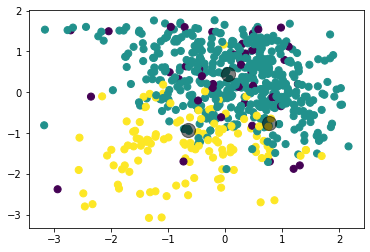

In [ ]:
# https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0

In [ ]:
!mkdir .kaggle
token = {"username":"username","key":"your kaggle api key"} # please use your own key if possible
with open('/content/.kaggle/kaggle.json','w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json # maybe run this twice
!kaggle config set -n path -v{/content}
!kaggle datasets download -d dhruvildave/billboard-the-hot-100-songs -p /content
!unzip \*.zip

In [ ]:
billboard_total = pd.read_csv('charts.csv')
billboard_total.head()

In [ ]:
b1960 = billboard_total[billboard_total.date.between('1960-01', '1969-12-31')]
b1960.drop_duplicates(subset=['song'], inplace=True)

b1970 = billboard_total[billboard_total.date.between('1970-01', '1979-12-31')]
b1970.drop_duplicates(subset=['song'], inplace=True)

b1980 = billboard_total[billboard_total.date.between('1980-01', '1989-12-31')]
b1980.drop_duplicates(subset=['song'], inplace=True)

b1990 = billboard_total[billboard_total.date.between('1990-01', '1999-12-31')]
b1990.drop_duplicates(subset=['song'], inplace=True)

b2000 = billboard_total[billboard_total.date.between('2000-01', '2010-12-31')]
b2000.drop_duplicates(subset=['song'], inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is tr

In [ ]:
# gets track ids from songs on billboard
# takes 15 minutes per dataset
# returns object.spotify_ids & object.artist_data
def getBillboardSongsFromSpotify(billboard_dataset):
  track_ids = []
  artist_data = []
  for i in range(len(billboard_dataset)):
    song = billboard_dataset.iloc[i].song
    artist = billboard_dataset.iloc[i].artist
    song.replace(' ','%20')
    track_result = spotify.search(q=song,type="track")
    for t in track_result['tracks']['items']:
      if(t['artists'][0]['name'] == artist and t['name'] == song):
        track_ids.append(t['id'])
        artist_data.append([t['artists'][0]['name'], t['name'], t['explicit'], t['popularity'], t['id']])
  return {
      'spotify_ids': track_ids,
      'artist_data': artist_data
  }

# takes about 5 minutes
# returns a .features & .columns
def getAudioFeaturesForDataframe(song_ids):
  song_f = []
  for song in song_ids:
    song_f.append(spotify.audio_features(tracks=song)) 
  feat_lst = [] 
  for i in song_f:
      if i[0] is not None:
        feat_lst.append(i[0].values())
  return {
      'features': feat_lst,
      'columns': song_f[0][0].keys()
  }

def makeArtistDataframe(artist_data, col):
  return pd.DataFrame(data=artist_data, columns=col)

def makeFeatureDataframe(feature_data, col):
  feat = pd.DataFrame(data=feature_data, columns=col)
  feat.drop(columns=['track_href', 'type', 'uri', 'analysis_url'], inplace=True)
  return feat

def makeArtistTrackAndTrackFeatureDataFrame(artist_df, feature_df):
  merged = artist_df.merge(feature_df, on="id")
  merged.drop_duplicates(inplace=True, subset=['song', 'artist'])
  return merged

In [ ]:
# runtime = ~82 minutes
billboard_li = [b1960, b1970, b1980, b1990, b2000]
list_of_artist_and_track_feature_dataframes = []
artist_columns = ['artist', 'song', 'explicit', 'popularity', 'id']
song_id_logs = []
audio_feature_logs = []
for li in billboard_li:
  credentials = oauth2.SpotifyClientCredentials(
          client_id=CLIENT_ID,
          client_secret=CLIENT_SECRET)

  spotify = spotipy.Spotify(auth=credentials.get_access_token(as_dict=False))

  songs = getBillboardSongsFromSpotify(li)
  song_id_logs.append(songs['spotify_ids'])
  artist_df = makeArtistDataframe(songs['artist_data'], artist_columns)
  audio_features = getAudioFeaturesForDataframe(songs['spotify_ids'])
  audio_feature_logs.append(audio_features['features'])
  track_feature_df = makeFeatureDataframe(audio_features['features'], audio_features['columns'])
  merged_df = makeArtistTrackAndTrackFeatureDataFrame(artist_df, track_feature_df)
  list_of_artist_and_track_feature_dataframes.append(merged_df)

In [ ]:
""" SAVING DATAFRAMES -- not necessary to go over today -- may be useful for getting google import

#from google.colab import  drive

#drive.mount('/drive')

bigbad_df = pd.concat(list_of_artist_and_track_feature_dataframes)

#bigbad_df.to_csv('/drive/My Drive/spotify/collection_of_all_df_7_14_21.csv')
i = 0
for df in list_of_artist_and_track_feature_dataframes:

  file_name = '/drive/My Drive/spotify/{}_df_single.csv'.format(i)
  df.to_csv(file_name)
  i+=1


collected_df = bigbad_df.append(y2k_merged)

#y2k_merged.to_csv('/drive/My Drive/spotify/4_df_single.csv')

#song_id_logs.to_txt('/drive/My Drive/spotify/song_id_logs_main.txt')

dfal= []
for a in audio_feature_logs:
  dfal.append(pd.DataFrame(a))

dfa = pd.concat(dfal)

file_name = '/drive/My Drive/spotify/audio_feature_logs_main.csv'.format(i)
dfa.to_csv(file_name)


with open('/drive/My Drive/spotify/song_id_logs_main.txt','w') as file:
    json.dump(song_id_logs, file)"""

  

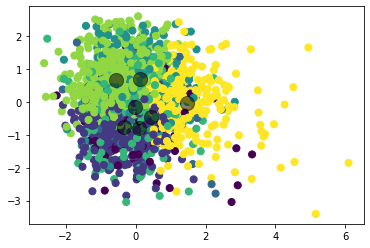

In [ ]:
get_optimal_kmean_clusters(y2k_copy)
# elbow score impl

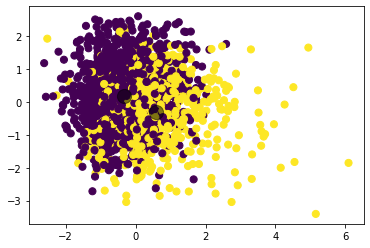

In [ ]:
make_graph(y2k_copy, 2, 30)